# 숙제

* 과적합 부분 복습 필요

# 기타 참고

## 자주 사용하는 함수 저장해놔서 사용하기  

python 파일로 디렉토리에 저장 후    
import python파일명 을 해주면 된다.  

In [1]:
# 타이타닉에서 많이 사용하는 다음 함수를 func01.py 파일에 저장하였다.

def fillna(data):
    data['Age'].fillna(data['Age'].mean(), inplace = True)
    data['Cabin'].fillna('N', inplace = True)
    data['Embarked'].fillna('N', inplace = True)
    data['Fare'].fillna(0, inplace = True)
    return data
def format_features(data):
    from sklearn.preprocessing import LabelEncoder
    data['Cabin'] = data['Cabin'].str[:1]
    features = ['Sex', 'Cabin', 'Embarked']
    for feature in features :
        le = LabelEncoder()
        data[feature] = le.fit_transform(data[feature])
        print(le.classes_)
    return data

def drop_features(data):
    data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return data

def transform_features(data):
    data = fillna(data)
    data = drop_features(data)
    data = format_features(data)
    return data

In [2]:
import func01

In [3]:
# 다음부터 해당 파일에 있는 함수는 아래와 같이 불러올 수 있다.

func01.drop_features(data)

NameError: name 'data' is not defined

# 분류 머신러닝

* `나이브 베이즈(Naive Bayes)` : 베이즈(Bayes) 통계와 생성 모델에 기반한  
* `로지스틱 회귀(Logistic Regression)` : 독립변수와 종속변수의 선형 관계성에 기반한  
* `결정 트리(Decision Tree)` : 데이터 균일도에 따른 규칙 기반의  
* `서포트 벡터 머신(Support Vector Machine)` : 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는  
* `최소 근접(Nearest Neighbor)` 알고리즘 : 근접 거리를 기준으로 하는  
* `신경망(Neural Network)` : 심층 연결 기반의  
* `앙상블(Ensemble)` : 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한  

## 분류 관련 개념

* 엔트로피 : 데이터 집합의 혼잡도. 불균일할 수록 엔트로피가 높다.  
* 지니 계수 : 불평등 지수. 데이터의 불균일도를 (혼잡도)를 나타내며 불균일할 수록 지니 계수가 높다.  
* 정보 이득 : 1 - 엔트로피  

## 결정 트리  

* 과대적합 문제가 쉽게 발생할 수 있다.  
* 하이퍼파라미터를 어떻게 설정하느냐에 따라 성능이 크게 좌지우지 된다.  
* 데이터량이 같다면 결정 트리의 분화(분기)가 많을 수록 각 분류된 leaf들은 순수도가 높겠지만, 모델 전체적으로는 과적합이 되어 성능이 낮아진다.  
  
> 사용 방법  
> `from sklearn.tree import DecisionTressClassifier` : 결정 트리 모델 import  
> 
  
> 파라미터  
> `min_samples_split` : 노드를 분할하기 위한 최소한의 샘플 데이터 수. 과적합을 제어하는 데 사용된다. 디폴트는 2. 본 노드에서 n개 이상인 경우에만 분기가 진행된다.     
> `min_samples_leaf` : 분할 후의 자식 노드가 가져야 할 최소한의 샘플 데이터 수. 값이 커질수록 분기가 억제된다. min_samples_leaf와 같이 과적합 방지 용.  
> `max_features` : 분할의 기준이 되는 피쳐(변수=칼럼)의 수를 제한한다.  
> `max_depth` : 최대 깊이값. 루트로부터 최대 몇 단계까지 갈 수 있는지(분화할 수 있는지)를 제한한다. 최대값 제한이 없으면 과적합이 발생할 수 있다.   
> `max_leaf_nodes` : 말단 노드(Leaf)의 최대 개수.  


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156)
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=12)
dt_clf.fit(X_train, y_train)


In [ ]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
export_graphviz(dt_clf, 'iris.dot',
                class_names=iris.target_names,
                feature_names=iris.feature_names,
                filled=True)

In [ ]:
with open('iris.dot') as f:    # iris.dot을 불러와 f라는 변수에 담음
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

### 옵션 1. min_samples_split : 데이터가 min 개수 이상이어야 split을 할 수 있다.

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split=20)
dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, 'iris1.dot',
                class_names=iris.target_names,
                feature_names=iris.feature_names,
                filled=True)

with open('iris1.dot') as f:    # iris.dot을 불러와 f라는 변수에 담음
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

### 옵션 2. max_depth : 분기 깊이 최대가 n을 넘어가지 않는다.

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=3)
dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, 'iris1.dot',
                class_names=iris.target_names,
                feature_names=iris.feature_names,
                filled=True)

with open('iris1.dot') as f:    # iris.dot을 불러와 f라는 변수에 담음
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

### 옵션 3. min_samples_leaf : 자식 노드에 포함된 자료 개수가 최소 min 값 이상이어야 한다.

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf=3)
dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, 'iris1.dot',
                class_names=iris.target_names,
                feature_names=iris.feature_names,
                filled=True)

with open('iris1.dot') as f:    # iris.dot을 불러와 f라는 변수에 담음
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

### 옵션 4. MAX_features : 고려할 feature(변수)의 개수 제한

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156, max_features=3)
dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, 'iris1.dot',
                class_names=iris.target_names,
                feature_names=iris.feature_names,
                filled=True)

with open('iris1.dot') as f:    # iris.dot을 불러와 f라는 변수에 담음
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

### Decision Tree에서 주요한 변수 확인

* `분류모델.feature_importances` : 주요한 변수 확인  
* 트리 분할 시 정보 이득이나 지니 계수를 얼마나 효율적으로 잘 개선시켰는지를 표현한 값임  

In [ ]:
show = pd.DataFrame([iris.feature_names,dt_clf.feature_importances_])
show

### barplot으로 중요도 확인

In [ ]:
import seaborn as sns

In [ ]:
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

### Titanic 시각화 하기

In [ ]:
# import
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import func01

In [ ]:
# 타이타닉 함수 불러와 사용

data = pd.read_csv('titanic.csv')
y = data['Survived']
X = data.drop(columns=['Survived'])
X = func01.transform_features(X)

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156)

# 테스트 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=11)
dt_clf.fit(X_train, y_train)


In [ ]:
export_graphviz(dt_clf, 'titanic1.dot',
                class_names = ['사망', '생존'],     # 0일 때에는 사망 , 1일 때에는 생존
                feature_names = None,
                filled=True)

with open('titanic1.dot', encoding='utf8') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

### 결정 트리 과적합

In [9]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import func01

In [10]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

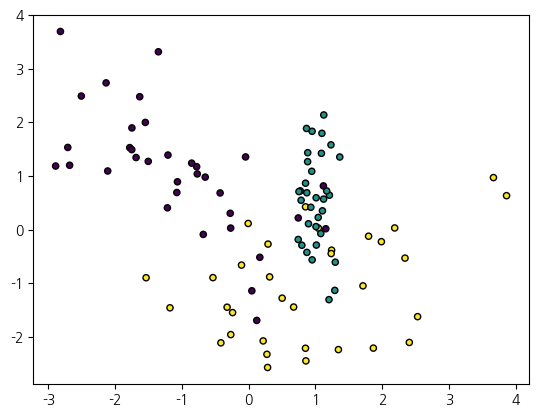

In [15]:
plt.rcParams['axes.unicode_minus']=False
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=20, edgecolor='k')

C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


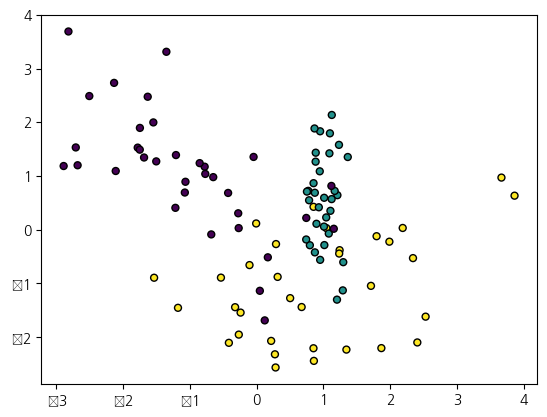

In [6]:
dt_clf = plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=25, edgecolor='k')

AttributeError: 'PathCollection' object has no attribute 'fit'

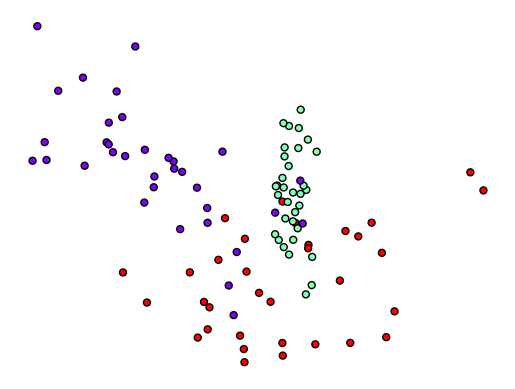

In [7]:
func01.visualize_boundary(dt_clf,X,y)